In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
adp = pd.read_csv("datasets/automobile_data_processed.csv")

adp.sample(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
114,0,91.0,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62.0,4800.0,27,32,8778.0
81,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,16630.0
107,0,85.0,subaru,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,2.64,9.0,82.0,4800.0,23,29,8013.0
86,1,154.0,plymouth,gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6229.0
150,-2,103.0,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,15985.0


In [3]:
adp_subset = adp[["horsepower", "city-mpg", "highway-mpg", "price"]]


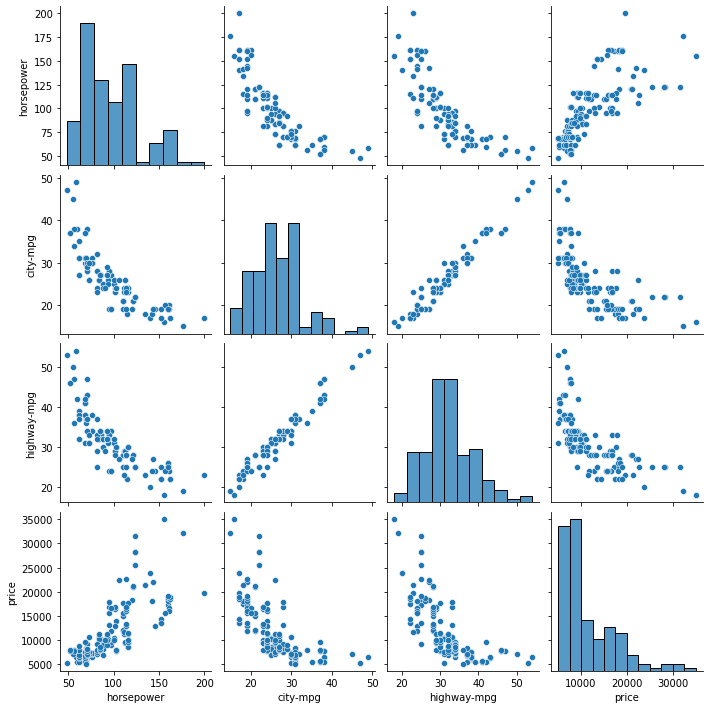

In [4]:
sns.pairplot(adp_subset)

plt.show()


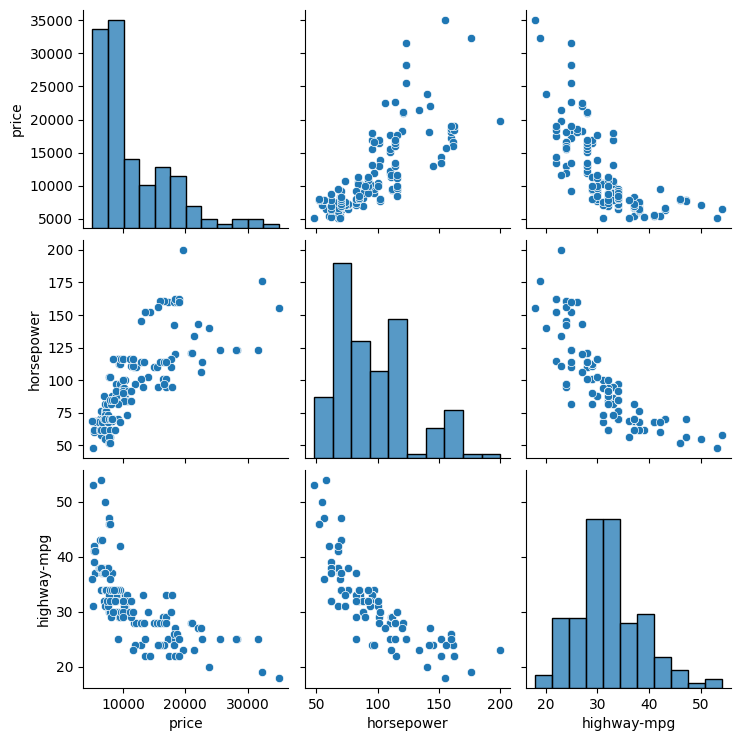

In [6]:
sns.pairplot(adp, vars=["price", "horsepower", "highway-mpg"])

plt.show()


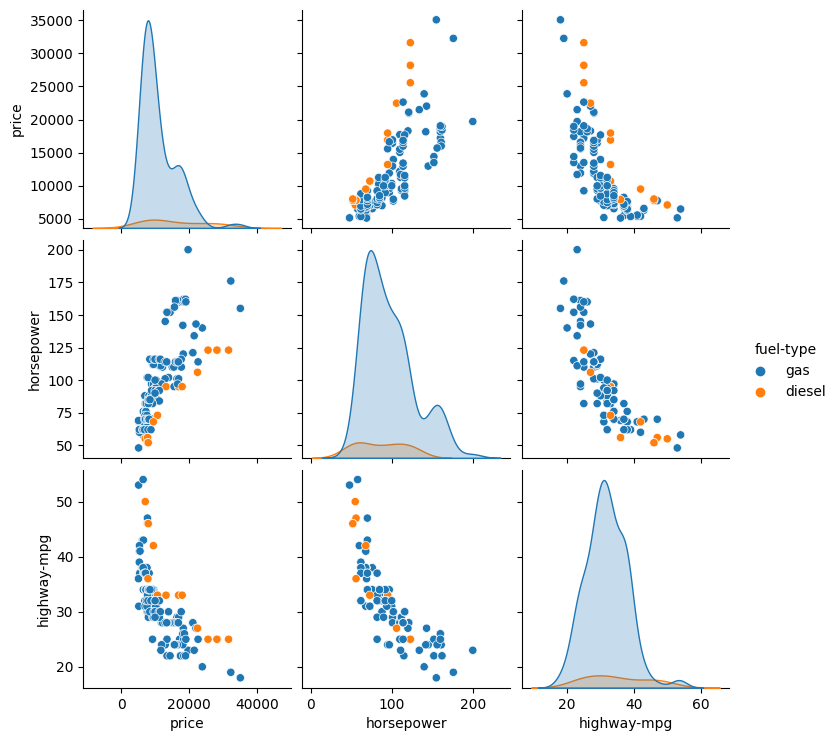

In [7]:
sns.pairplot(adp, vars=["price", "horsepower", "highway-mpg"], hue="fuel-type")

plt.show()


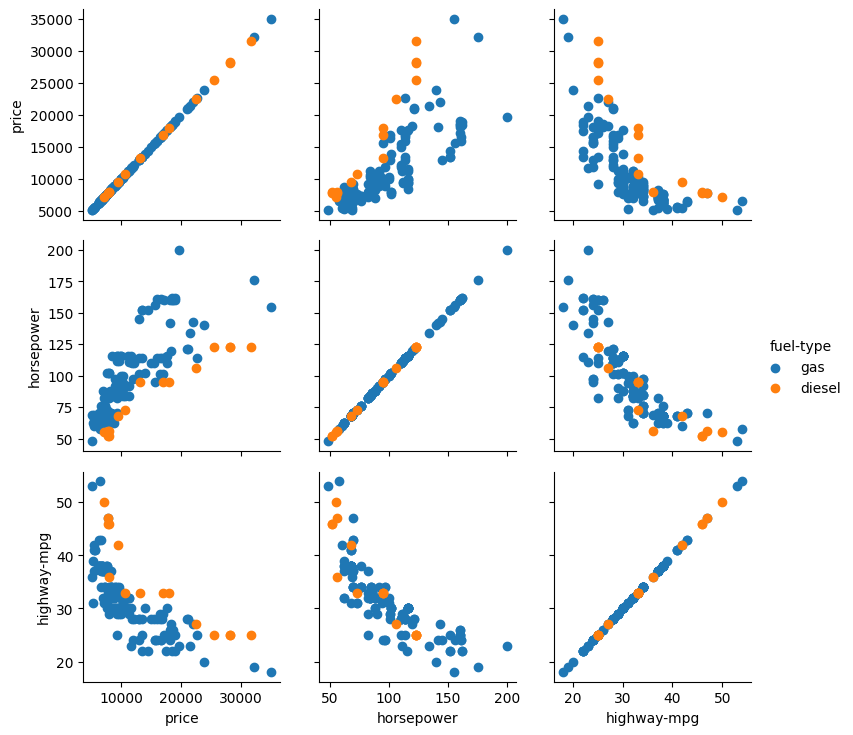

In [8]:
g = sns.PairGrid(adp, vars=["price", "horsepower", "highway-mpg"], hue="fuel-type")

g.map(plt.scatter)

g.add_legend()

plt.show();

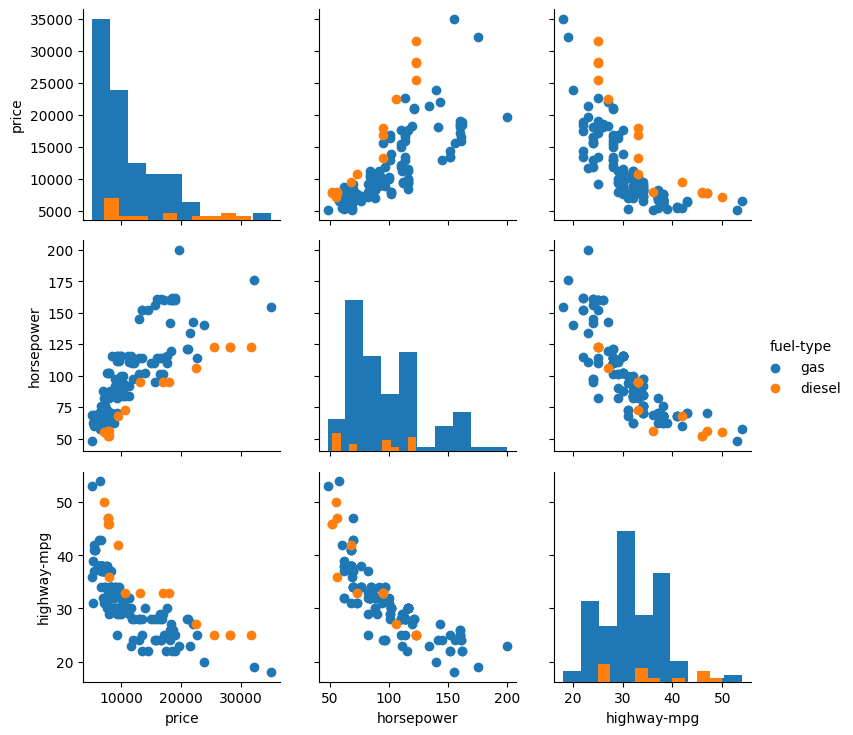

In [11]:
g = sns.PairGrid(adp, vars=["price", "horsepower", "highway-mpg"], hue="fuel-type")

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

g.add_legend()

plt.show();

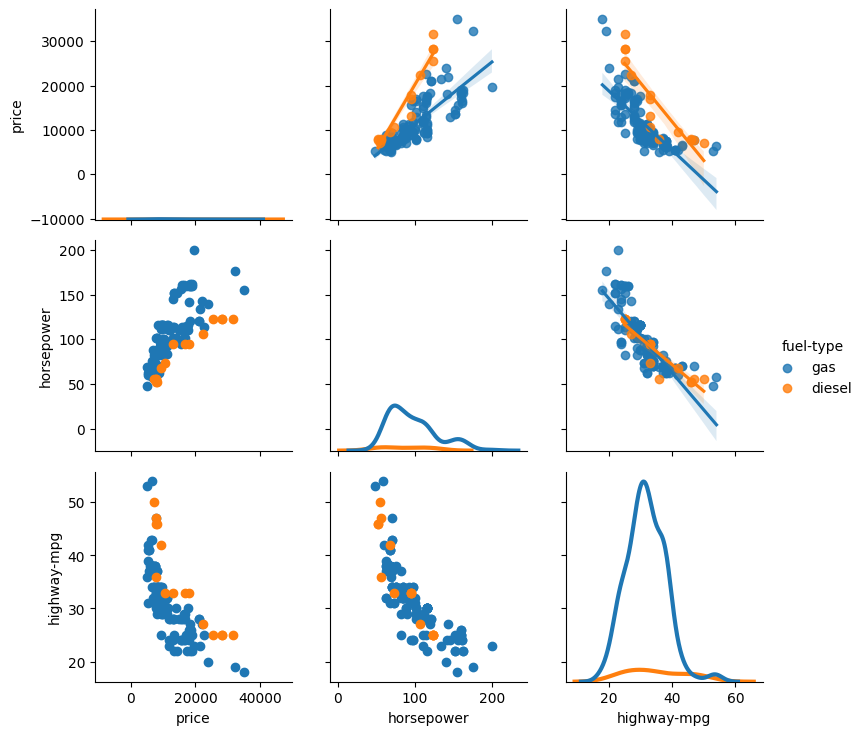

In [13]:
g = sns.PairGrid(adp, vars=["price", "horsepower", "highway-mpg"], hue="fuel-type")

g.map_lower(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.map_upper(sns.regplot)

g.add_legend()

plt.show();

In [14]:
a_corr = adp[["engine-size", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]].corr()

a_corr

,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-size,1.000000,0.812073,-0.284686,-0.699139,-0.714095,0.841496
horsepower,0.812073,1.000000,0.074057,-0.837214,-0.827941,0.759874
peak-rpm,-0.284686,0.074057,1.000000,-0.052929,-0.032777,-0.171916
city-mpg,-0.699139,-0.837214,-0.052929,1.000000,0.971999,-0.692273
highway-mpg,-0.714095,-0.827941,-0.032777,0.971999,1.000000,-0.720090
price,0.841496,0.759874,-0.171916,-0.692273,-0.720090,1.000000


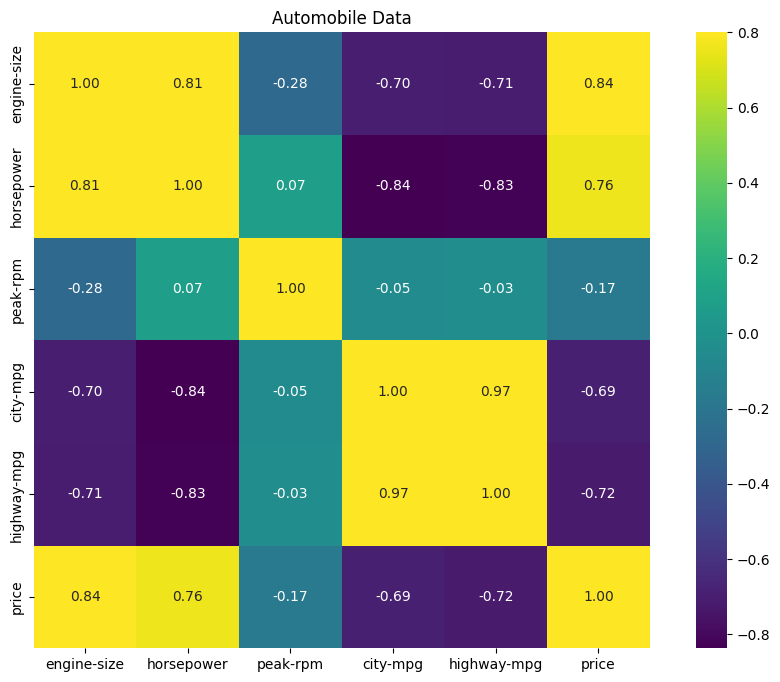

In [15]:
plt.figure(figsize=(12, 8))

sns.heatmap(a_corr, vmax=.8, square=True, annot=True, fmt='.2f', cmap="viridis")

plt.title("Automobile Data")

plt.show();